*By Roeland Wiersema for PHYS249*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

About this notebook:

1. **There may/will be typos**
2. **Whenever I write (*thank you Mathematica 12*) it means I used Mathematica 12 to do the algebra for me. Doing this by hand will take a large amount of time as you'll see from the derivations.**
3. **You won't have to reproduce these derivations, but maybe they give some insight into how interpolation is mathematically formulated.**


# 1. Interpolation
Consider the following setup. We have a set of points $\mathcal{D} = \{(x_i,y_i)\}$ produced by some function $f$ such that $y_i=f(x_i)$. We are interested in **interpolating** between these points. This means finding a function $g(x)$ that produces a smooth curve in the interval $[x_{\mathrm{start}},x_{\mathrm{end}}]$ where $x_{\mathrm{start}},x_{\mathrm{end}}$ are in our data set. In other words, $g(x)$ smoothly connects $x_{\mathrm{start}}$ to $x_{\mathrm{end}}$. The function $g(x)$ is called an **interpolant**.

Consider the function $f(x) = \sin(x)$. 

In [2]:
def function(x):
    return np.sin(x)

We produce a data set of points obtained from this function and store this data in two arrays, `x_grid_data` and `y_data`. Let's plot the function $f(x)$ in blue and the data as single points in red.

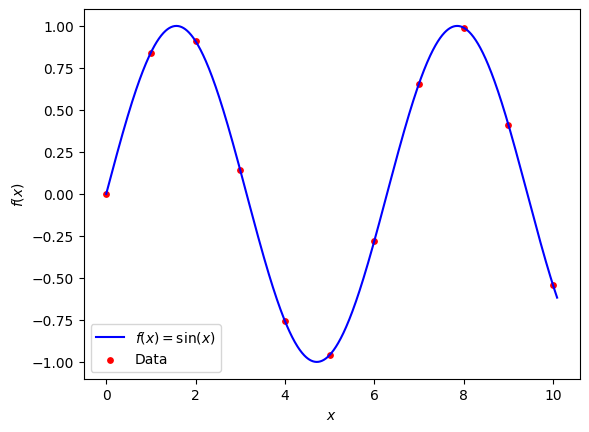

In [3]:
number_of_data_points = 10
delta = 1.0
x_grid_data = np.arange(0, number_of_data_points+0.1, delta)
x_grid_fine = np.arange(0, number_of_data_points+0.1, 0.01)
y_data = function(x_grid_data)
y_fine = function(x_grid_fine)

plt.plot(x_grid_fine, y_fine, label=r'$f(x)=\sin(x)$', color='blue', markersize=6)
plt.scatter(x_grid_data, y_data, label='Data', c='red', s=15)

plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$')
plt.legend()

We now want to find interpolants between all of the red points that approximate the blue curve as closely as possible. How can we achieve this?

## 1.1 Linear interpolation
The simplest way to interpolate between two points is parameterize a line between these two curves. Remember that the function of of a line is
$$
\begin{align}
    g(x) = ax + b
\end{align}
$$
which is a polynomial of degree 1. To interpolate between two points $(x_0,y_0)$ and $(x_1,y_0)$, we need to find coefficients $a,b$ such that $g(x)$ satisfies the following constraints:
$$
\begin{align}
    g(x_0) &= y_0\\
    g(x_1) &= y_1
\end{align}
$$
To find the coefficients, we solve the system of equations defined by the constraints:
$$
\begin{align}
&\begin{cases}
ax_0+b = y_0\\
ax_1 +b = y_1\\
\end{cases}
\end{align}
$$
Subtract equation 2 from 1,
$$
\begin{align}
a(x_0-x_1) &= (y_0-y_1)\\
a &= \frac{(y_0-y_1)}{(x_0-x_1)}\\
\end{align}
$$
Plug in the solution for $a$ into $ ax_0+b = y_0$,
$$
\begin{align}
\frac{x_0 (y_0-y_1)}{(x_0-x_1)}+b &= y_0\\
b &= y_0 - \frac{x_0 (y_0-y_1)}{(x_0-x_1)} \\
b &= \frac{y_0(x_0-x_1)}{(x_0-x_1)} - \frac{x_0 (y_0-y_1)}{(x_0-x_1)} \\
b &= \frac{(x_0y_1 - x_1y_0 )}{(x_0-x_1)} \\
\end{align}
$$
Hence we find the interpolating function
$$
\begin{align}
    g(x) = \frac{(x_0y_1 - x_1y_0 )}{(x_0-x_1)}  +  \frac{(y_0-y_1)}{(x_0-x_1)} x
\end{align}
$$

Note that for $x\in [x_0,x_1]$, this function **interpolates**, whereas for $x\notin [x_0,x_1]$, the function **extrapolates**. Note that $a,b$ both depend on $(x_0,y_0)$ and $(x_1,y_1)$. We can separate out the $y-$dependence by rewriting $g(x)$ as follows:
$$
\begin{align}
    g(x) &= \frac{(x_0y_1 - x_1y_0 )}{(x_0-x_1)}  +  \frac{(y_0-y_1)}{(x_0-x_1)} x\\
    g(x) &= \frac{(x-x_1)}{(x_0-x_1)}y_0 +\frac{(x_0 -x)}{(x_0-x_1)}y_1 \\
    g(x) &= L_0(x)y_0 +L_1(x)y_1 \\
    g(x) &= \sum_{i=0}^1 L_i y_i
\end{align}
$$
Here, we have defined the **basis functions**
$$
\begin{align}
    L_0(x) &:= \frac{(x-x_1)}{(x_0-x_1)}\\
    L_1(x) &:= \frac{(x-x_0)}{(x_1 - x_0)}
\end{align}
$$
Let's write a Python function that corresponds to this interpolant:

In [4]:
# In terms of coefficients a and b
def g(x, x_0, y_0, x_1,y_1):
    a = (y_0 - y_1)/(x_0 - x_1)
    b = (x_0 * y_1 - x_1 * y_0 )/(x_0 - x_1)
    return b + a*x

# In terms of basis functions
def g_in_terms_of_basis_functions(x, x_0, y_0, x_1,y_1):
    L0 = (x-x_1)/(x_0-x_1)
    L1 = (x-x_0)/(x_1-x_0)
    return L0*y0 + L1*y1

We will now choose two points and draw a line between them with our interpolant. We will choose the second and third point in our dataset:

In [5]:
point_number = 2 # zero-indexing
x0, y0 = x_grid_data[point_number], y_data[point_number]
x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]

First we plot the original data from our function, and mark our data points on the plot:

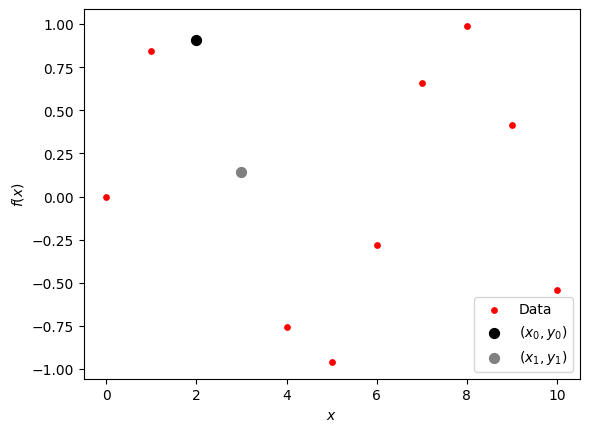

In [6]:
fig, axs = plt.subplots(1,1) 
# using axs allows you to update a figure instead of replotting the whole thing.
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
axs.scatter([x0,], [y0,], label=r'$(x_0,y_0)$', c='black', s=50, marker='o')
axs.scatter([x1,], [y1,], label=r'$(x_1,y_1)$', c='gray', s=50, marker='o')

axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')
axs.legend(loc='lower right')

Finally, we add a line between our select points

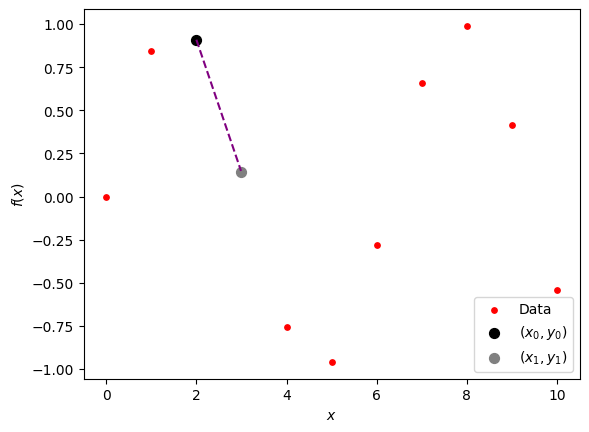

In [7]:
x_line = np.arange(x0,x1, 0.01)
y_line = g(x_line, x0, y0, x1, y1)
# plot the line on the previous plot
axs.plot(x_line, y_line, label='$g(x)$', c='purple', linestyle='dashed')
fig

Note how our function that uses the basis function definition produces the same line:

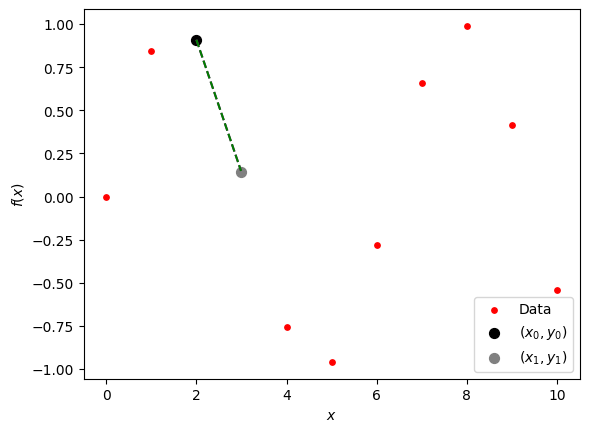

In [8]:
y_line = g_in_terms_of_basis_functions(x_line, x0, y0, x1, y1)
# plot the line on the previous plot
axs.plot(x_line, y_line, label='$g(x)$', c='green', linestyle='dashed')
fig

We now loop over all the points in the data, and interpolate between them:

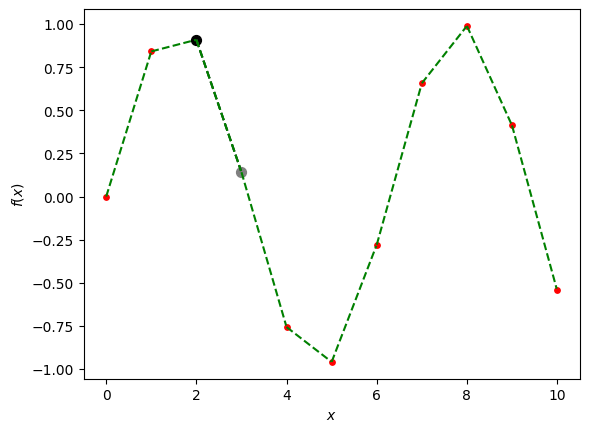

In [9]:
# stop at the first to last point
for point_number in range(len(x_grid_data)-1):
    # select two points
    x0, y0 = x_grid_data[point_number], y_data[point_number]
    x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]
    # create a fine grid for the line
    x_line = np.arange(x0,x1, 0.01)
    # calculate the y-values with our interpolant
    y_line = g(x_line, x0, y0, x1, y1)
    # plot the line on the previous plot
    axs.plot(x_line, y_line, c='green', linestyle='dashed')
# remove the legend
axs.get_legend().remove()
fig

Wonderful! We have created a function that find any point on a line between two points in our data set. However, if we overlay the original function,

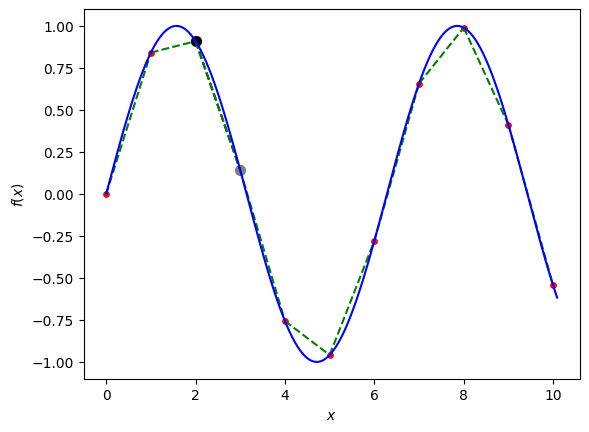

In [10]:
axs.plot(x_grid_fine, y_fine, color='blue', markersize=6)
fig

We see that our linear interpolant does a poor job of capturing the function between data points. We need a more powerful interpolation method to approximate the function in a better way.

##  1.2 Quadratic interpolation
A more accurate interpolant is a quadratic interpolation, where we use a degree-2 polynomial of the form 
$$
\begin{align}
    h(x) = ax^2 + bx + c
\end{align}
$$
Note that this equation has three parameters, hence we need three constraints, e.g. three point $(x_0,y_0)$ ,$(x_1,y_0)$ and $(x_2,y_2)$. Again, we need to solve a system of equations:
$$
\begin{align}
    g(x_0) &= y_0\\
    g(x_1) &= y_1\\
    g(x_2) &= y_2\\
\end{align}
$$
To find the coefficients, we solve the system of equations defined by the constraints:
$$
\begin{align}
&\begin{cases}
ax_0^2 + bx_0 + c = y_0\\
ax_1^2 + bx_1 + c = y_1\\
ax_2^2 + bx_2 + c = y_2\\
\end{cases}
\end{align}
$$

Subtract equation 2 from 1,
$$
\begin{align}
a(x_0^2 - x_1^2) + b(x_0-x_1) = y_0-y_1\\
a = \frac{(y_0-y_1)-b(x_0-x_1)}{(x_0^2 - x_1^2) }\\
\end{align}
$$

Subtract equation 3 from 2 and plug in the solution for $a$,
$$
\begin{align}
\frac{(y_0-y_1)-b(x_0-x_1)}{(x_0^2 - x_1^2) }(x_1^2 - x_2^2) + b(x_1-x_2) = y_1-y_2\\
\end{align}
$$

Solve for $b$ (*Thank you Mathematica 12*)
$$
\begin{align}
    b = \frac{x_0^2 \left(y_1-y_2\right)+x_2^2 \left(y_0-y_1\right)+x_1^2 \left(y_2-y_0\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}\\
\end{align}
$$

Find $a$ (*Thank you Mathematica 12*)
$$
\begin{align}
    a = \frac{x_2 \left(y_1-y_0\right)+x_1 \left(y_0-y_2\right)+x_0 \left(y_2-y_1\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}\\
\end{align}
$$

Find $c$ by plugging in the equations for $(a,b)$ into the third equation and solving for $c$ (*Thank you Mathematica 12*)
$$
\begin{align}
c = \frac{x_1 x_2 \left(x_2-x_1\right) y_0+x_0 x_2 \left(x_0-x_2\right) y_1+x_0 x_1 \left(x_1-x_0\right) y_2}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}
\end{align}
$$

which brings the full interpolating function $h(x) = ax^2 +bx +c$ to
$$
\begin{align}
h(x) =  \frac{x_2 \left(y_1-y_0\right)+x_1 \left(y_0-y_2\right)+x_0 \left(y_2-y_1\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}x^2 + \frac{x_0^2 \left(y_1-y_2\right)+x_2^2 \left(y_0-y_1\right)+x_1^2 \left(y_2-y_0\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}x+\frac{x_1 x_2 \left(x_2-x_1\right) y_0+x_0 x_2 \left(x_0-x_2\right) y_1+x_0 x_1 \left(x_1-x_0\right) y_2}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}
\end{align}
$$

Well. That looks absolutely horrific. But all is not lost, there is a way to reorganize this in a neat way! We will employ the same technique as for linear interpolation and organize the terms as $h(x) = \sum_{i=0}^2L_i(x) y_i$. This can be done as follows (*thank you Mathematica 12*). We first collect the $y_i$ terms on the right.
$$
\begin{align}
h(x) &=  \frac{-\left(\left(x_1-x_2\right) \left(x \left(x_2-x\right)+x_1 \left(x+x_2\right)\right)\right.}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)} y_0 \\
&+ \frac{\left(x_0-x_2\right) \left(x \left(x_2-x\right)+x_0 \left(x+x_2\right)\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}y_1\\
&+ \frac{-\left(\left(x_0-x_1\right) \left(x \left(x_1-x\right)+x_0 \left(x+x_1\right)\right) \right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) \left(x_1-x_2\right)}y_2
\end{align}
$$

Note that the products, $\left(x_1-x_2\right)$, $\left(x_0-x_2\right)$ and $\left(x_0-x_1\right)$ now cancel a single term in the denominator. Yay!
$$
\begin{align}
h(x) &=  \frac{- \left(x \left(x_2-x\right)+x_1 \left(x+x_2\right)\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) } y_0 \\
&+ \frac{x \left(x_2-x\right)+x_0 \left(x+x_2\right)}{\left(x_0-x_1\right) \left(x_1-x_2\right)}y_1\\
&+ \frac{- \left(x \left(x_1-x\right)+x_0 \left(x+x_1\right)\right)}{\left(x_0-x_2\right) \left(x_1-x_2\right)}y_2
\end{align}
$$
We can simplify this further
$$
\begin{align}
h(x) &=  \frac{\left(x-x_1\right) \left(x-x_2\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) } y_0 \\
&+ \frac{\left(x-x_1\right) \left(x-x_2\right)}{\left(x_1-x_0\right) \left(x_1-x_2\right) }y_1\\
&+ \frac{\left(x-x_0\right) \left(x-x_1\right)}{\left(x_0-x_2\right) \left(x_1-x_2\right)}y_2
\end{align}
$$
Let's define the following basis functions:
$$
\begin{align}
    L_0(x) &:=  \frac{\left(x-x_1\right) \left(x-x_2\right)}{\left(x_0-x_1\right) \left(x_0-x_2\right) }\\
    L_1(x) &:= \frac{\left(x-x_1\right) \left(x-x_2\right)}{\left(x_1-x_0\right) \left(x_1-x_2\right) }\\
    L_2(x) &:= \frac{\left(x-x_0\right) \left(x-x_1\right)}{\left(x_0-x_2\right) \left(x_1-x_2\right)}
\end{align}
$$
This allows us to rewrite the interpolant compactly as
$$
\begin{align}
    h(x) = \sum_{i=0}^2L_i(x) y_i
\end{align}
$$
This clearly took a little more work to derive than the linear interpolation although the principle is the same: Find the coefficients of the polynomial by imposing the constraints given by the data. We will code up the interpolant function $h(x)$ that uses the basis functions.

In [11]:
def h(x, x_0, y_0, x_1, y_1, x_2, y_2):
    L_0 = ((x-x_1)*((x-x_2)))/((x_0-x_1)*((x_0-x_2)))
    L_1= ((x-x_0)*((x-x_2)))/((x_1-x_0)*((x_1-x_2)))
    L_2= ((x-x_0)*((x-x_1)))/((x_2-x_0)*((x_2-x_1)))
    return L_0 * y_0 + L_1 * y_1 + L_2 * y_2

We repeat the same process as for linear interpolation, now selecting three points:

In [12]:
point_number = 1 # zero-indexing
x0, y0 = x_grid_data[point_number], y_data[point_number]
x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]
x2, y2 = x_grid_data[point_number+2], y_data[point_number+2]

We highlight the selected points

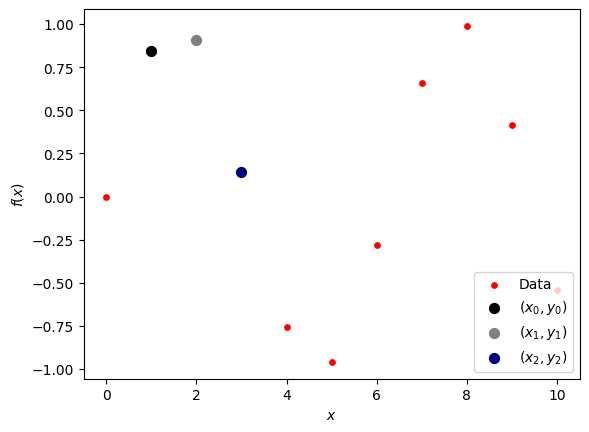

In [13]:
fig, axs = plt.subplots(1,1) 
# using axs allows you to update a figure instead of replotting the whole thing.
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
axs.scatter([x0,], [y0,], label=r'$(x_0,y_0)$', c='black', s=50, marker='o')
axs.scatter([x1,], [y1,], label=r'$(x_1,y_1)$', c='gray', s=50, marker='o')
axs.scatter([x2,], [y2,], label=r'$(x_2,y_2)$', c='navy', s=50, marker='o')

axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')
axs.legend(loc='lower right')

Let's plot the segment with our quadratic interpolant:

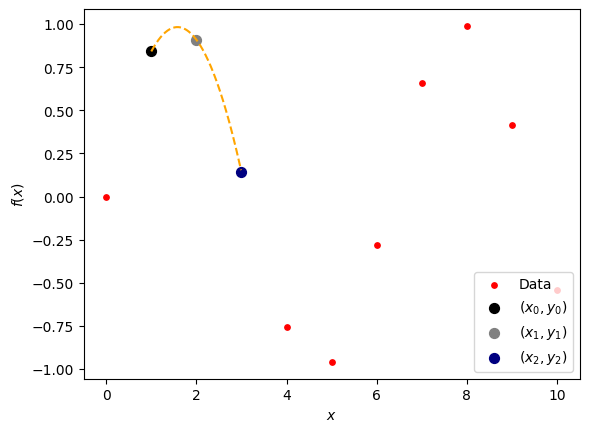

In [14]:
x_line = np.arange(x0,x2, 0.01)
y_line = h(x_line, x0, y0, x1, y1, x2, y2)
# plot the line on the previous plot
axs.plot(x_line, y_line, label='$g(x)$', c='orange', linestyle='dashed')
fig

That looks beautiful. We can again loop over all the points to perform a piecewise interpolation

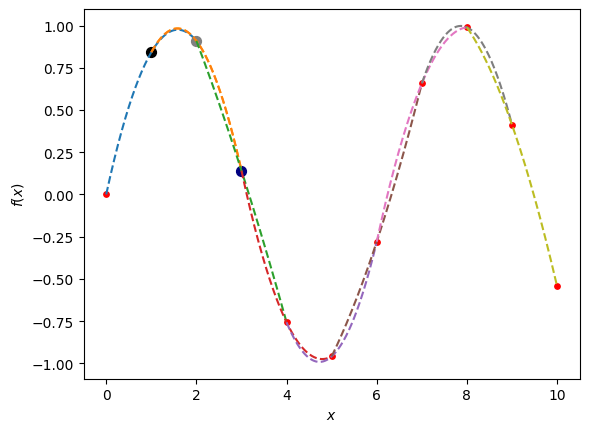

In [15]:
# stop at the second to last point
for point_number in range(len(x_grid_data)-2):
    # select two points
    x0, y0 = x_grid_data[point_number], y_data[point_number]
    x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]
    x2, y2 = x_grid_data[point_number+2], y_data[point_number+2]
    # create a fine grid for the line
    x_line = np.arange(x0,x2, 0.01)
    # calculate the y-values with our interpolant
    y_line = h(x_line, x0, y0, x1, y1, x2, y2)
    # plot the line on the previous plot
    axs.plot(x_line, y_line, linestyle='dashed')
# remove the legend
axs.get_legend().remove()
fig

This looks much better than the linear interpolation! Note that the lines do not overlap perfectly, because the shapes of the curves depend on their starting point. We can fix this by separating the points into non-overlapping sets. We then produce a quadratic interpolant for each subset.

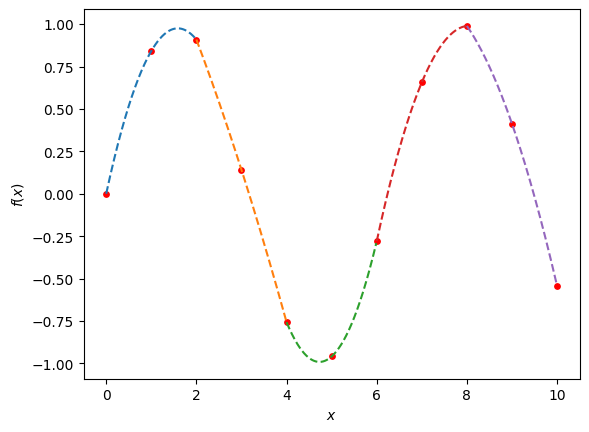

In [16]:
fig, axs = plt.subplots(1,1) 
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')
for point_number in range(0, len(x_grid_data)-2, 2):
    # select three points
    x0, y0 = x_grid_data[point_number], y_data[point_number]
    x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]
    x2, y2 = x_grid_data[point_number+2], y_data[point_number+2]
    # create a fine grid for the line
    x_line = np.arange(x0,x2, 0.01)
    # calculate the y-values with our interpolant
    y_line = h(x_line, x0, y0, x1, y1, x2, y2)
    # plot the line on the previous plot
    axs.plot(x_line, y_line, linestyle='dashed')

That looks pretty good! Note however that the curves are not connected smoothly. Especially on the second peak, we see a discontinuous jump. This problem can be solved with a so-called **spline interpolation**, where we ensure that the derivatives of our interpolant at the connecting points are equal to the derivatives of our

## 1.3 Cubic, quartic, quintic,...interpolation (extra)
The procedure for linear and quadratic interpolation can be generalized to create interpolants of polynomials of degree $n$. 

**1.** Linear interpolation, the interpolant is a polynomial of degree 1: $g(x) = ax+b$. We need two points to find the parameters $a,b$ and write down the basis functions $L_0(x),L_1(x)$.

**2.** Quadratic interpolation, the interpolant is a polynomial of degree 2: $h(x) = ax^2+bx+c$. We need three points to find the parameters $a,b,c$ and write down the basis functions $L_0(x),L_1(x),L_2(x)$.

**3.** Cubic interpolation, the interpolant is a polynomial of degree 3: $k(x) = ax^3+bx^2+cx+d$. We need four points to find the parameters $a,b,c,d$ and write down the basis functions $L_0(x),L_1(x),L_2(x),L_3(x)$.

**4.** Quartic interpolation, etc.

...

**N.**   N-polynomial interpolation, the interpolant is a polynomial of degree N: $p_N(x) = \sum_{i=0}^N k_i x_i^i$. We need $N+1$ points to find the parameters $(k_0, ...,k_N)$ and write down the basis functions $L_0(x),L_1(x),...,L_N(x)$.

Instead of repeating the derivation for each polynomial, which as we've seen will quickly become painful, we can realize that the basis functions $L_i(x)$ for a $N$ degree interpolation will be of the form
$$
\begin{align}
L_i(x) = \frac{(x - x_0)(x - x_1)\ldots(x - x_N)}{(x_i - x_0)(x_i - x_1)\ldots(x_i - x_N)}
\end{align}
$$

where we leave out the term $(x-x_i)/(x_i - x_i)$. We can denote this compactly with
$$
\begin{align}
L_i(x) = \prod_{j\neq i}\frac{(x - x_j)}{(x_i - x_j)}
\end{align}
$$
these basis functions are called **Lagrange polynomials**. An arbitrary interpolant function can then be defined as
$$
p_N(x) = \sum_{i=0}^N L_i(x) y_i
$$
We can write this in Python with the following code:

In [17]:
from math import prod

def Lagrange_polynomial(x, i, x_data):
    numerator = []
    denominator = []
    N = len(x_data)
    for j in range(N):
        if j!=i:
            numerator.append(x-x_data[j])
            denominator.append(x_data[i]-x_data[j])
    return prod(numerator) / prod(denominator)

def p_N(x, x_data, y_data):
    basis_functions = []
    N = len(x_data)
    for i in range(N):
        basis_functions.append(Lagrange_polynomial(x, i, x_data)*y_data[i])
    return sum(basis_functions)


Note that this will perform an interpolation of degree $N$ depending on the number of points passed to $p_N$. For instance, if we pass 5 points we perform a quintic interpolation and fit a 5-degree polynomial to the points. Here we illustrate this by passing the first 5 points to `p_N` and plotting the interpolating curve.

In [18]:
point_number = 1 # zero-indexing
x_0_to_4 = x_grid_data[0:5]
y_0_to_4 = y_data[0:5]

We plot the data, and interpolate between the first 5 points with a quintic interpolant.

Text(0.5, 0, '$x$')

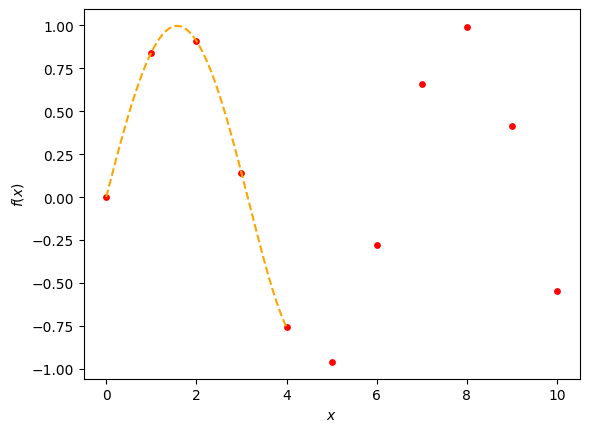

In [19]:
fig, axs = plt.subplots(1,1) 
# using axs allows you to update a figure instead of replotting the whole thing.
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)

x_line = np.arange(x_0_to_4[0],x_0_to_4[-1], 0.01)
y_line = p_N(x_line, x_0_to_4,y_0_to_4)

axs.plot(x_line, y_line, label='$g(x)$', c='orange', linestyle='dashed')

axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')

Beautiful.

# 2. Spline interpolation

As mentioned in the previous section, we run into problems when connecting different pieces of the data together, because we do not take the derivatives at the endpoints into account. With spline interpolation, we want to fit a polynomial between points that takes this constraint into account. Formally, this means that we are looking for a function $s(t)$ such that
$$
\begin{align}
s(x_0) = y_0\\
s(x_1) = y_1\\
s'(x_0) = v_0\\
s'(x_1) = v_1
\end{align}
$$
where $v_0, v_1$ are the derivatives at the points $(x_0,y_0)$ and $(x_1,y_1)$, respectively. This defines a set of constraints to which we can fit a polynomial. Hence a spline interpolation is nothing more then an interpolation that has the correct derivatives at the end points.

## 2.1 Hermite spline interpolation
We can derive the spline interpolant similarly as above. To start, we realize that we have 4 constraints. This means that we need at least a cubic polynomial, since this has 4 free parameters. Hence we propose the following interpolant:
$$
\begin{align}
   s(x)= ax^3 + bx^2 + cx + d
\end{align}
$$
With our constraints, this defines the following system of equations
$$
\begin{align}
ax_0^3 + bx_0^2 + cx_0 + d = y_0\\
ax_1^3 + bx_1^2 + cx_1 + d = y_1\\
3ax_0^2 + 2bx_0^1 + c = v_0\\
3ax_1^2 + 2bx_1 + c = v_1\\
\end{align}
$$
We can solve for $a,b,c,d$ to find (*Thank you Mathematica 12*)
$$
\begin{align}
a &= \frac{\left(v_0+v_1\right) \left(x_0-x_1\right)-2 y_0+2 y_1}{\left(x_0-x_1\right){}^3}\\
b &= \frac{-v_0 \left(x_0-x_1\right) \left(x_0+2 x_1\right)+v_1 \left(-2 x_0^2+x_1 x_0+x_1^2\right)+3 \left(x_0+x_1\right) \left(y_0-y_1\right)}{\left(x_0-x_1\right)^3}\\
c &= \frac{v_1 x_0 \left(x_0-x_1\right) \left(x_0+2 x_1\right)-x_1 \left(v_0 \left(-2 x_0^2+x_1 x_0+x_1^2\right)+6 x_0 \left(y_0-y_1\right)\right)}{\left(x_0-x_1\right)^3}\\
d &= \frac{x_1 \left(x_0 \left(x_1-x_0\right) \left(v_1 x_0+v_0 x_1\right)-x_1 \left(x_1-3 x_0\right) y_0\right)+\left(x_0-3 x_1\right) x_0^2 y_1}{\left(x_0-x_1\right)^3}
\end{align}
$$

Again, this is quite unintelligble, so we make an effort to write it into something more sensible.
Plugging this into our equation for $s(x)$ and rearranging, we find (*Thank you Mathematica 12*)
$$
\begin{align}
   s(x)=\frac{v_0 \left(x-x_1\right){}^2 \left(x-x_0\right)}{\left(x_0-x_1\right){}^2}+\frac{v_1 \left(x-x_1\right) \left(x-x_0\right){}^2}{\left(x_0-x_1\right){}^2}-\frac{\left(x-x_1\right){}^2 \left(2 x-3 x_0+x_1\right) y_0}{\left(x_0-x_1\right){}^3}+\frac{\left(2 x+x_0-3 x_1\right) \left(x-x_0\right){}^2 y_1}{\left(x_0-x_1\right){}^3}
\end{align}
$$

We can now define 
$$
t(x) = \frac{(x-x_0)}{(x_1-x_0)}
$$
and write (*Thank you Mathematica 12*)
$$
\begin{align}
   s(x)&=(t^3(x)-2 t^2(x)+t(x))(x_1-x_0)v_0 \\
   &+(t^3(x)-t^2(x))(x_1-x_0)v_1\\
   &+(2t^3(x) - 3t^2(x) + 1)y_0\\
   &+(-2t^3(x) + 3t^2(x))y_1
\end{align}
$$
We identify the terms in front of $(y_0,y_1,v_0,v_1))$ as the **Hermite basis functions**:
$$
\begin{align}
   h_{10}(x)&=t^3(x)-2 t^2(x)+t(x)\\
   h_{11}(x)&=t^3(x)-t^2(x)\\
   h_{00}(x)&=2t^3(x) - 3t^2(x) + 1\\
   h_{01}(x)&=-2t^3(x) + 3t^2(x)
\end{align}
$$
Note that $t(x_0) = 0$ and $t(x_1)=1$. Hence we can get rid of the dependence on $x$, and reparameterize our polynomial purely in terms of the time $t\in[0,1]$!.
$$
\begin{align}
   s(t)&=h_{10}(t)v_0' + h_{11}(t)v_1' + h_{00}(t)y_0 + h_{01}(t)y_1
\end{align}
$$
where we have rescaled the tangent values $v_0'=(x_1-x_0)v_0$ and $v_1'=(x_1-x_0)v_1$ and use the time dependent Hermite basis functions
$$
\begin{align}
h_{10}(t)&=t^3-2 t^2+t\\
h_{11}(t)&=t^3-t^2\\
h_{00}(t)&=2t^3 - 3t^2 + 1\\
h_{01}(t)&=-2t^3 + 3t^2
\end{align}
$$
Implementing this interpolant can now be achieved as follows. First, we define the Hermite basis functions separately:

In [20]:
def h10(t):
    return t**3 - 2*t**2 + t
def h11(t):
    return t**3 - t**2
def h00(t):
    return 2*t**3 - 3*t**2 + 1
def h01(t):
    return -2*t**3 + 3*t**2

Next, we define our interpolant, where we remember to rescale the derivatives with $(x_1-x_0)$

In [21]:
def s(t, x_0,y_0,v_0,x_1,y_1,v_1):
    return h10(t)*(x_1-x_0)*v_0 + h11(t)*(x_1-x_0)*v_1 + h00(t)*y_0 + h01(t)*y_1

Let's see how well this works. We again choose two points, and use the analytical derivative of $\sin(x)$ to supply the derivatives $v_0,v_1$:

In [22]:
point_number = 2 # zero-indexing
x0, y0 = x_grid_data[point_number], y_data[point_number]
x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]
v0, v1 = np.cos(x0), np.cos(x1)

We plot the data and interpolate using our spline function for times in the interval $t\in[0,1]$. To find the corresponding x coordinates we use the definition of t(x):
$$
x = t(x_1-x_0) +x_0
$$

Text(0.5, 0, '$x$')

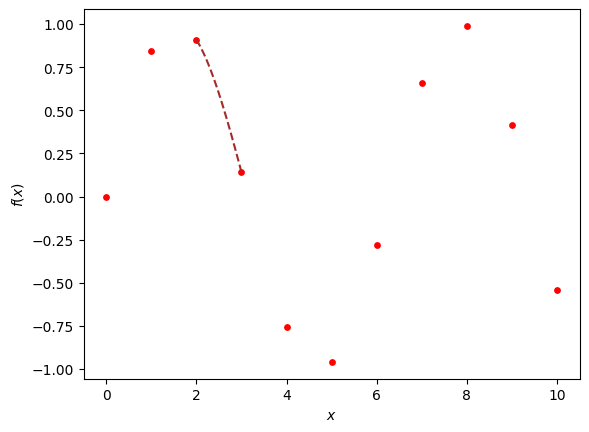

In [23]:
fig, axs = plt.subplots(1,1) 
# using axs allows you to update a figure instead of replotting the whole thing.
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)

times = np.arange(0.,1., 0.01)
y_line = s(times, x0,y0,v0,x1,y1,v1)

axs.plot(times*(x1-x0)+x0, y_line, c='brown', linestyle='dashed')

axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')

Looks pretty good. Now what happens if we perform a piecewise interpolation?

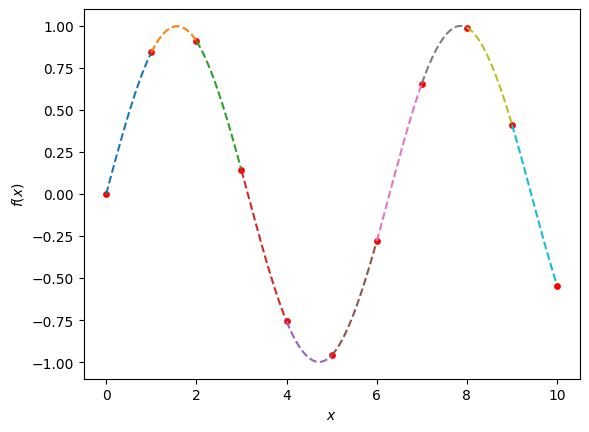

In [24]:
fig, axs = plt.subplots(1,1) 
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')
for point_number in range(len(x_grid_data)-1):
    # select two points
    x0, y0 = x_grid_data[point_number], y_data[point_number]
    x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]
    v0, v1 = np.cos(x0), np.cos(x1)    # create a fine grid for the line
    times = np.arange(0.,1., 0.01)
    y_line = s(times, x0,y0,v0,x1,y1,v1)

    axs.plot(times*(x1-x0)+x0, y_line, linestyle='dashed')

I think I might cry. That's art right there. Notice how we got rid of discontinuities between the sections!

## 2.2 Catmul-Rom spline interpolation
From the above example, it should be clear that we've cheated a little bit. We used our knowledge of the underlying function $\sin(x)$, to calculate the derivatives $v_0,v_1$ at each point with $\cos(x)$. What if we do not know the underlying function? What values do we plug in for $v_0,v_1$? 

We add two additional points, $(x_{-1}, y_{-1})$ and $(x_2,y_2)$ and approximate the derivatives with the standard method:
$$
\begin{align}
\tilde{v}_0 &= \frac{y_{1}-y_{-1}}{x_{1}-x_{-1}}\\
\tilde{v}_1 &= \frac{y_{2}-y_{0}}{x_{2}-x_{0}}
\end{align}
$$
For our $\sin(x)$ function, this looks like this. 

Text(0.5, 0, '$x$')

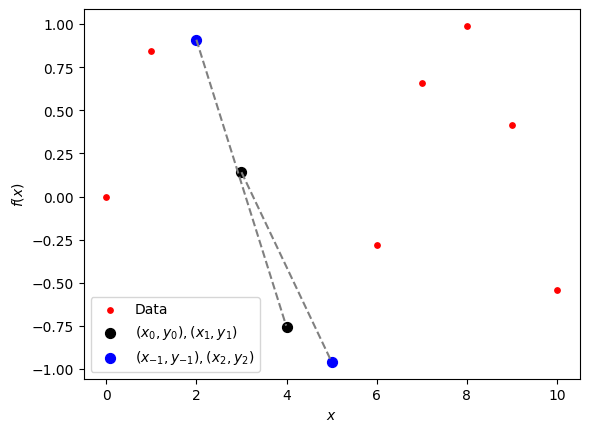

In [25]:
point_number = 3
x0, y0 = x_grid_data[point_number], y_data[point_number]
x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]

xm1, ym1 = x_grid_data[point_number-1], y_data[point_number-1]
x2, y2 = x_grid_data[point_number+2], y_data[point_number+2]

fig, axs = plt.subplots(1,1) 
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
# plot the two points
axs.scatter([x0,x1], [y0,y1], label='$(x_0, y_0), (x_1,y_1)$', c='black', s=50)
axs.scatter([xm1,x2], [ym1,y2], label='$(x_{-1}, y_{-1}), (x_2,y_2)$', c='blue', s=50)
# we can reuse the linear interpolant to draw a line!
x_line_1 = np.arange(xm1,x1, 0.01)
y_line_1 = g(x_line_1, xm1, ym1, x1, y1)
axs.plot(x_line_1,y_line_1, linestyle='dashed', color='gray')
x_line_2 = np.arange(x0, x2, 0.01)
y_line_2 = g(x_line_2, x0, y0, x2, y2)
axs.plot(x_line_2,y_line_2, linestyle='dashed', color='gray')
axs.legend()
axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')

Where we denote by the gray lines the approximations $\tilde{v}_0,\tilde{v}_1$ and the lines they generate from point $(x_{-1}, y_{-1})\to(x_1, y_1)$ and  $(x_{0}, y_{0})\to(x_2, y_2)$, respectively.

We now have approximations for $v_0,v_1$ and we can plug those into our previously derived formula to produce the Catmul-Rom spline. This gives the interpolant
$$
\begin{align}
   u(t)&=h_{10}(t)\tilde{v}_0' + h_{11}(t)\tilde{v}_1' + h_{00}(t)y_0 + h_{01}(t)y_1
\end{align}
$$
where we again rescaled the derivatives $\tilde{v}_0'=(x_1-x_0)\tilde{v}_0$ and $\tilde{v}_1'=(x_1-x_0)\tilde{v}_1$. The implementation in terms of code is now simple. We just call our previous spline function, but calculate the approximations to $v_0,v_1$ in the function:

In [26]:
def u(t, x_m1, y_m1, x_0, y_0, x_1, y_1, x_2, y_2):
    # approximate v0, v1
    v0 = (y_1 - y_m1)/(x_1 - x_m1)
    v1 = (y_2 - y_0)/(x_2 - x_0)
    return s(times, x0, y0, v0, x1, y1, v1)

We again plot a single curve using this new function:

Text(0.5, 0, '$x$')

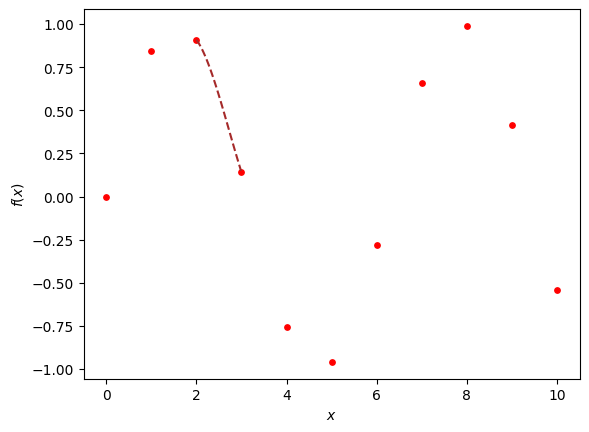

In [27]:
point_number = 2
x0, y0 = x_grid_data[point_number], y_data[point_number]
x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]

xm1, ym1 = x_grid_data[point_number-1], y_data[point_number-1]
x2, y2 = x_grid_data[point_number+2], y_data[point_number+2]

fig, axs = plt.subplots(1,1) 
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')


times = np.arange(0.,1., 0.01)
y_line = u(times, xm1, ym1,x0,y0, x1,y1, x2,y2)

axs.plot(times*(x1-x0)+x0, y_line, label='$g(x)$', c='brown', linestyle='dashed')

axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')

And perform the piece-wise spline interpolation.

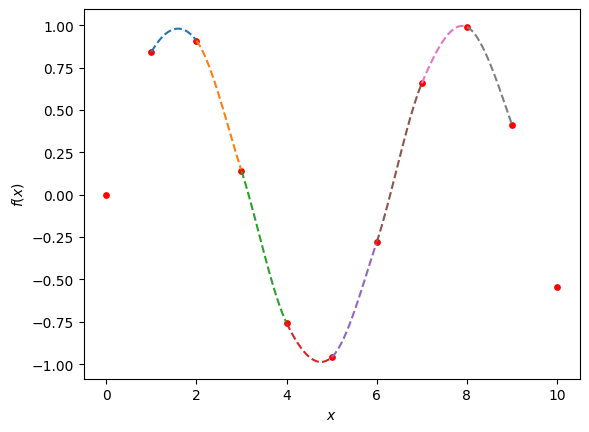

In [28]:
fig, axs = plt.subplots(1,1) 
axs.scatter(x_grid_data, y_data, label='Data', c='red', s=15)
axs.set_ylabel(r'$f(x)$')
axs.set_xlabel(r'$x$')

for point_number in range(1,len(x_grid_data)-2):
    x0, y0 = x_grid_data[point_number], y_data[point_number]
    x1, y1 = x_grid_data[point_number+1], y_data[point_number+1]

    xm1, ym1 = x_grid_data[point_number-1], y_data[point_number-1]
    x2, y2 = x_grid_data[point_number+2], y_data[point_number+2]


    times = np.arange(0.,1., 0.01)
    y_line = u(times, xm1, ym1, x0, y0, x1, y1, x2, y2)

    axs.plot(times*(x1-x0)+x0, y_line, label='$u(x)$', linestyle='dashed')


Note that we have a problem at the edges, because there are no points $(x_{-1}, y_{-1}),(x_2, y_2)$ to help us approximate the derivative.

Finally, an alternative construction is possible, where the interpolant is rewritten as
$$
\tilde{u}(t) =\frac{1}{2}\left( P_{-1}(t)x_{-1} + P_{0}(t)x_{0}+P_{1}(t)x_{1} + P_{2}(t)x_{2}\right)
$$
and the dependence on the $y-$coordinates is eliminated. The Catmul-Rom basis functions are then given by
$$
\begin{align}
P_{-1}(t) &= -t^3+2t^2-t\\
P_{0}(t) &= 3t^3-5t^2+2\\
P_{1}(t) &= -3t^3+4t^2+t\\
P_{2}(t) &= t^3 - t^2
\end{align}
$$